In [3]:
# %tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

# import tensorflow.compat.v2.feature_column as fc
import tensorflow.feature_column as fc

import tensorflow as tf

## Data
- Titanic dataset
    - ZACH DEL ROSARIO WHAT ARE YOU DOING HERE???

In [5]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

### Important- separating train and test datasets

In [6]:
dftrain.head() # sure does look like the titanic dataset
# doesn't include the survived column

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [7]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [8]:
dftrain.loc[0], y_train.loc[0] # looking at one row

(sex                          male
 age                          22.0
 n_siblings_spouses              1
 parch                           0
 fare                         7.25
 class                       Third
 deck                      unknown
 embark_town           Southampton
 alone                           n
 Name: 0, dtype: object,
 0)

In [9]:
dftrain.describe() # fancier info

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [10]:
dftrain.shape

(627, 9)

<Axes: >

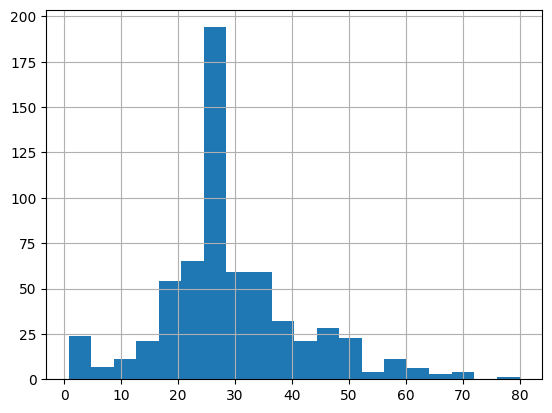

In [11]:
dftrain.age.hist(bins=20)

<Axes: ylabel='sex'>

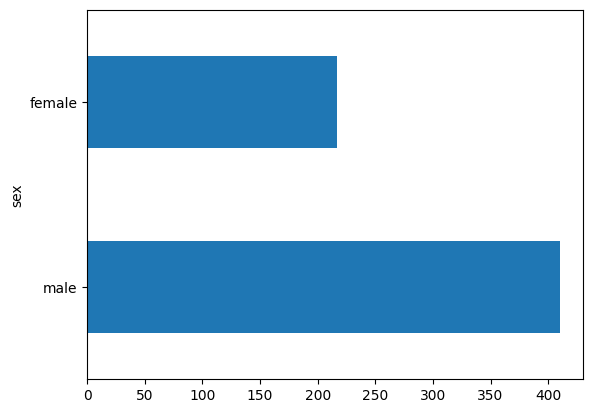

In [12]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: ylabel='class'>

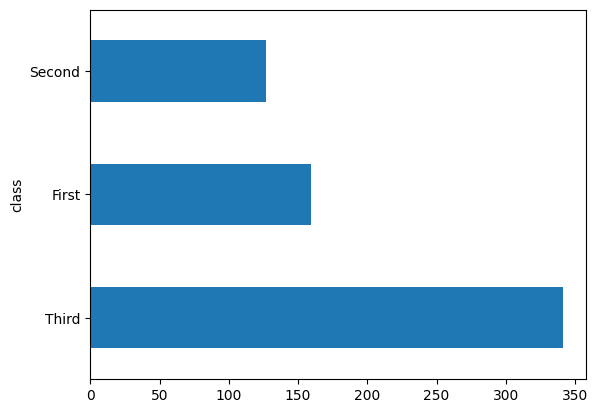

In [13]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survival')

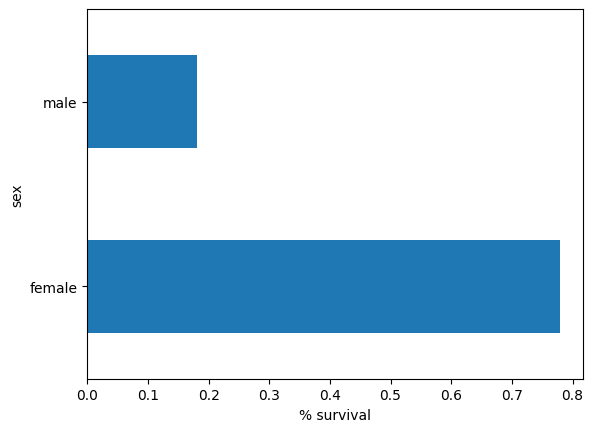

In [15]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survival')